In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
class NeuralNetwork:
    def __init__(self,x,y):
        self.input = x
        self.weight1 = np.random.rand(self.input.shape[1], 4)
        self.weight2 = np.random.rand(4,1)
        self.y = y
        self.output=np.zeros(self.y.shape)
        self.epoch = 0
        self.loss_history = []
        
    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))

    def sigmoid_derivative(self,x):
        return x * (1.0 - x)
        
    def feedforward(self):
        self.layer1 = self.sigmoid(np.dot(self.input, self.weight1))
        self.output = self.sigmoid(np.dot(self.layer1, self.weight2))

    def backpropagation(self):
        d_weight2 = np.dot(self.layer1.T,2 * (self.output - self.y)) * self.sigmoid_derivative(self.output)
        d_weight1 = np.dot(self.input.T,  (np.dot(2*(self.output-self.y) * self.sigmoid_derivative(self.output), self.weight2.T) * self.sigmoid_derivative(self.layer1)))
        
        self.weight1 -= d_weight1
        self.weight2 -= d_weight2

    def save_loss(self):
        loss = np.sum((self.output - self.y) ** 2)
        self.loss_history.append(loss)


In [ ]:
X = np.array(
    [
     [0,0,1],
     [0,1,1],
     [1,0,1],
     [1,1,1]
    ]
)
y = np.array([[0],[1],[1],[0]])
nn = NeuralNetwork(X,y)

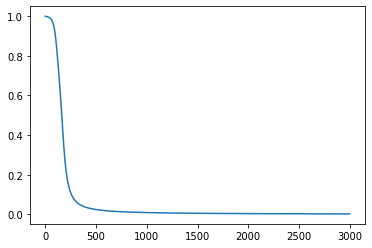

In [ ]:
for i in range(3000):
    nn.feedforward()
    nn.backpropagation()
    nn.save_loss()

plt.plot(nn.loss_history)